In [119]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [120]:
test = pd.read_csv("test_new.csv")
train = pd.read_csv("train_new.csv")
sentiment = pd.read_csv("using-financial-news-to-predict-the-s-p-500-cs-v2/sentiment_gpt4_only.csv")

In [121]:
train = train.drop(columns ='Unnamed: 0')
test = test.drop(columns ='Unnamed: 0')


In [122]:
# assuming df is your DataFrame and 'date' and 'sentiment' are your columns

# convert 'date' to datetime if it's not already
sentiment['Date'] = pd.to_datetime(sentiment['Date']).dt.date
#print(sentiment[sentiment["Date"] == sentiment["Date"][0]])
# group by 'date' and calculate sentiment score for each date
grouped = sentiment.groupby('Date')
grouped_len = grouped.size()
grouped_df = grouped.apply(lambda x: ((x['Sentiment'] == 'positive').sum() - (x['Sentiment'] != 'positive').sum())/ grouped_len[x["Date"]].count())

# convert Series to DataFrame and rename column
grouped_df = grouped_df.reset_index().rename(columns={0: 'score'})
#grouped_df["score"] = grouped_df["score"].apply(lambda x : 1 if x >0 else 0)

print(grouped_df)

           Date     score
0    2010-01-04  0.176471
1    2010-01-05 -0.571429
2    2010-01-06 -0.058824
3    2010-01-07 -0.250000
4    2010-01-08  0.000000
..          ...       ...
515  2011-12-26  0.800000
516  2011-12-27 -0.538462
517  2011-12-28 -0.857143
518  2011-12-29  0.400000
519  2011-12-30 -0.600000

[520 rows x 2 columns]


C:\Users\willa\AppData\Local\Temp\ipykernel_26728\1291522779.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped_df = grouped.apply(lambda x: ((x['Sentiment'] == 'positive').sum() - (x['Sentiment'] != 'positive').sum())/ grouped_len[x["Date"]].count())


In [123]:
train['Date']= pd.to_datetime(train['Date'])
test["Date"] = pd.to_datetime(train["Date"])
grouped_df["Date"] = pd.to_datetime(grouped_df["Date"])
train = train.merge(grouped_df,on = "Date",how = "left")
test = test.merge(grouped_df,on = "Date", how = "left")

In [124]:

train["score"] = train["score"].fillna(0)
nan_count = train.isna().sum()
#train = train["CL=F",'GC=F',"HG=F","JPY=X","SI=F","XWD.TO","^DJI";"^GSPC","^IXIC","^RUT","^TNX","^TYX","^VIX","VII","IVV","SPY","XLK","XLV","JNK","VNQ","AAPL","AMZN","XOM","SHEL","CVX"].fillna(train["CL=F",'GC=F',"HG=F","JPY=X","SI=F","XWD.TO","^DJI";"^GSPC","^IXIC","^RUT","^TNX","^TYX","^VIX","VII","IVV","SPY","XLK","XLV","JNK","VNQ","AAPL","AMZN","XOM","SHEL","CVX"].rolling(11, min_periods=1, center=True).mean())
nan_count.loc[nan_count >0]
columns = nan_count.index[2:-1]
columns

Index(['CL=F', 'EURUSD=X', 'GC=F', 'HG=F', 'JPY=X', 'SI=F', 'XWD.TO', '^DJI',
       '^GSPC', '^IXIC', '^RUT', '^TNX', '^TYX', '^VIX', 'VTI', 'IVV', 'SPY',
       'XLK', 'XLV', 'JNK', 'VNQ', 'AAPL', 'AMZN', 'XOM', 'SHEL', 'CVX'],
      dtype='object')

In [125]:
# train[columns] = train[columns].fillna(train[columns].rolling(11,min_periods=1, center = True).mean())
test[columns] = test[columns].fillna(test[columns].rolling(11,min_periods=1,center=True).mean())

In [126]:
train = train.dropna()
target = train["target"]
train = train.drop("target",axis = 1)
train = train.drop("Date",axis = 1)
test = test.drop("Date",axis =1)
test["score"] = test["score"].fillna(1)
nan_count = test.isna().sum()
print(nan_count)


train

CL=F        0
EURUSD=X    0
GC=F        0
HG=F        0
JPY=X       0
SI=F        0
XWD.TO      0
^DJI        0
^GSPC       0
^IXIC       0
^RUT        0
^TNX        0
^TYX        0
^VIX        0
VTI         0
IVV         0
SPY         0
XLK         0
XLV         0
JNK         0
VNQ         0
AAPL        0
AMZN        0
XOM         0
SHEL        0
CVX         0
score       0
dtype: int64


,CL=F,EURUSD=X,GC=F,HG=F,JPY=X,SI=F,XWD.TO,^DJI,^GSPC,^IXIC,...,XLK,XLV,JNK,VNQ,AAPL,AMZN,XOM,SHEL,CVX,score
1,81.510002,1.442398,1117.699951,3.3880,92.495003,17.440001,22.935871,10583.959961,1132.989990,2308.419922,...,18.996113,24.806660,47.240723,25.503166,6.461977,6.6950,39.913574,29.257694,44.538490,0.176471
2,81.769997,1.436596,1118.099976,3.3960,91.584999,17.781000,22.945892,10572.019531,1136.520020,2308.709961,...,18.971621,24.563374,47.685249,25.474552,6.473148,6.7345,40.069424,29.290546,44.853973,-0.571429
3,83.180000,1.440403,1135.900024,3.4775,92.356003,18.163000,22.845692,10573.679688,1137.140015,2301.090088,...,18.759371,24.814499,47.841415,25.428747,6.370185,6.6125,40.415749,29.051226,44.859596,-0.058824
4,82.660004,1.431803,1133.099976,3.4115,93.389999,18.333000,22.905811,10606.860352,1141.689941,2300.050049,...,18.685913,24.900822,47.997623,25.703529,6.358408,6.5000,40.288780,28.910454,44.690609,-0.250000
5,82.750000,1.441109,1138.199951,3.3880,92.660004,18.458000,22.945892,10618.190430,1144.979980,2317.169922,...,18.808355,24.940065,48.177841,25.514622,6.400681,6.6760,40.127148,28.868219,44.769470,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,97.440002,1.437298,1613.400024,4.4645,77.930000,39.778999,22.945892,12240.110352,1300.670044,2766.250000,...,21.697847,27.686176,56.059204,36.819775,11.830904,11.1950,48.819996,37.385132,62.317192,-1.000000
410,95.699997,1.433199,1628.300049,4.4740,77.730003,40.091999,22.915833,12143.240234,1292.280029,2756.379883,...,21.522736,27.540880,56.059204,36.825817,11.790445,11.1260,47.819164,37.390217,61.717903,-0.846154
412,93.790001,1.426208,1641.900024,4.3890,77.459999,40.081001,22.344688,11866.620117,1254.050049,2669.239990,...,21.055754,26.491547,55.609348,35.112423,11.743040,10.5850,46.650509,36.348206,61.379726,-1.000000
413,91.930000,1.417334,1663.400024,4.3200,77.334999,41.747002,22.344688,11896.440430,1260.339966,2693.070068,...,21.272564,26.539982,55.483227,34.822834,11.853552,10.4980,46.578583,35.736149,60.970356,-0.272727


In [127]:
to_compute_score = pd.read_csv('using-financial-news-to-predict-the-s-p-500-cs-v2/test.csv',index_col=0)
columns = to_compute_score.columns
columns = columns.drop(["^GSPC"])
to_compute_score = to_compute_score.drop(columns,axis=1)
to_compute_score["pct"] = (to_compute_score["^GSPC"] - to_compute_score["^GSPC"].shift(1))/to_compute_score["^GSPC"].shift(1)
to_compute_score["target"] = to_compute_score["pct"].apply(lambda x: 1 if x > 0 else 0)
print(to_compute_score["target"])

Date
2011-08-08    0
2011-08-09    1
2011-08-10    0
2011-08-11    1
2011-08-12    1
             ..
2011-12-26    0
2011-12-27    0
2011-12-28    0
2011-12-29    1
2011-12-30    0
Name: target, Length: 105, dtype: int64


In [128]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sklearn.metrics import f1_score
real = torch.tensor(to_compute_score["target"].values, dtype=torch.float32)
print(train.values)
X_train_tensor = torch.tensor(train.values, dtype=torch.float32)
print(X_train_tensor)

y_train_tensor = torch.tensor(target.values, dtype=torch.float32)
X_test_tensor = torch.tensor(test.values, dtype= torch.float32)

[[ 8.15100021e+01  1.44239783e+00  1.11769995e+03 ...  2.92576942e+01
   4.45384903e+01  1.76470588e-01]
 [ 8.17699966e+01  1.43659592e+00  1.11809998e+03 ...  2.92905464e+01
   4.48539734e+01 -5.71428571e-01]
 [ 8.31800003e+01  1.44040334e+00  1.13590002e+03 ...  2.90512257e+01
   4.48595963e+01 -5.88235294e-02]
 ...
 [ 9.37900009e+01  1.42620802e+00  1.64190002e+03 ...  3.63482056e+01
   6.13797264e+01 -1.00000000e+00]
 [ 9.19300003e+01  1.41733396e+00  1.66340002e+03 ...  3.57361488e+01
   6.09703560e+01 -2.72727273e-01]
 [ 8.66299973e+01  1.43529677e+00  1.65619995e+03 ...  3.32158890e+01
   5.74578171e+01 -6.00000000e-01]]
tensor([[ 8.1510e+01,  1.4424e+00,  1.1177e+03,  ...,  2.9258e+01,
          4.4538e+01,  1.7647e-01],
        [ 8.1770e+01,  1.4366e+00,  1.1181e+03,  ...,  2.9291e+01,
          4.4854e+01, -5.7143e-01],
        [ 8.3180e+01,  1.4404e+00,  1.1359e+03,  ...,  2.9051e+01,
          4.4860e+01, -5.8824e-02],
        ...,
        [ 9.3790e+01,  1.4262e+00,  1.6419

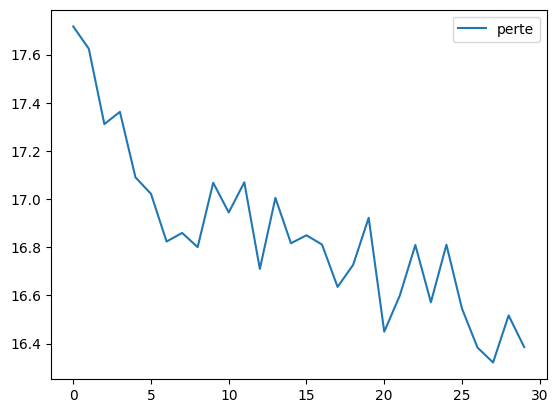

In [129]:
# Définir le modèle CNN 1D
class CausalConv1d(nn.Conv1d):
    def __init__(self, in_channels, out_channels, kernel_size, stride=1, dilation=1, groups=1, bias=True):
        super(CausalConv1d, self).__init__(in_channels, out_channels, kernel_size, stride, padding=0, dilation=dilation, groups=groups, bias=bias)
        self.left_padding = dilation * (kernel_size - 1)

    def forward(self, input):
        input = nn.functional.pad(input, (self.left_padding, 0))
        return super(CausalConv1d, self).forward(input)

class CNN1DModel(nn.Module):
    def __init__(self):
        super(CNN1DModel, self).__init__()
        self.conv1 = CausalConv1d(in_channels=27, out_channels=64, kernel_size=5, stride=1)
        self.fc1 = nn.Linear(in_features=64, out_features=128)
        self.fc2 = nn.Linear(in_features=128, out_features=64)
        self.fc3 = nn.Linear(in_features=64, out_features=32)
        self.fc4 = nn.Linear(in_features=32, out_features=16)
        self.fc5 = nn.Linear(in_features=16, out_features=2)
        self.norm1 = nn.BatchNorm1d(128)
        self.norm2 = nn.BatchNorm1d(64)
        self.norm3 = nn.BatchNorm1d(32)
        self.norm4 = nn.BatchNorm1d(16)
        self.dropout1 = nn.Dropout(0.2)
        self.dropout2 = nn.Dropout(0.1)

    def forward(self, x):
        x = x.unsqueeze(1)
        x = x.permute(0, 2, 1)  # Permuter les dimensions pour obtenir (batch_size, channels, sequence_length)
        x = F.relu(self.conv1(x))
        x = x.view(x.size(0), -1)  # Aplatir le tenseur pour la couche linéaire
        x = F.relu(self.norm1(self.fc1(x)))
        x = self.dropout1(x)
        x = F.relu(self.norm2(self.fc2(x)))
        x = self.dropout1(x)
        x = F.relu(self.norm3(self.fc3(x)))
        x = self.dropout1(x)
        x = F.relu(self.norm4(self.fc4(x)))
        x = self.dropout2(x)
        x = F.softmax(self.fc5(x), dim=1) 
        return x

# Créer une instance du modèle
model = CNN1DModel()
model = CNN1DModel()
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
#Faisons un crossvalidation pour des séries temporelles
perte = []
val_perte = []
f1 = []
epoch = 30
batch_size = 15
num_batches = len(y_train_tensor) // batch_size
for k in range(epoch):
    loss_train = 0
    for i in range(num_batches):
        start_idx = i * batch_size
        end_idx = (i + 1) * batch_size
        if i == 0 :
            batch_X_tensor = X_train_tensor[start_idx+3:end_idx]
            batch_y_tensor = y_train_tensor[start_idx+3:end_idx]
        elif i == num_batches - 1 :
            batch_X_tensor = X_train_tensor[start_idx:end_idx-3]
            batch_y_tensor = y_train_tensor[start_idx:end_idx-3]
        else :
            batch_X_tensor = X_train_tensor[start_idx:end_idx]
            batch_y_tensor = y_train_tensor[start_idx:end_idx]
        optimizer.zero_grad()
        output = model(batch_X_tensor)
        loss = loss_function(output, F.one_hot(batch_y_tensor.long(), 2).float())
        loss.backward()
        optimizer.step()

        loss_train += loss.item()
    perte.append(loss_train)

out = model(X_test_tensor)
y_pred_cnn = torch.argmax(out, dim=1).numpy()
plt.figure(1)   
plt.plot(perte, label="perte")
plt.legend()
plt.show()


In [136]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, GradientBoostingClassifier,VotingClassifier
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.svm import SVC
from sklearn.metrics import f1_score,classification_report
from sklearn.model_selection import TimeSeriesSplit

In [152]:
base_models = [
    ('xgboot', XGBClassifier(n_estimators=100, max_depth=4,subsample = 0.7, learning_rate=0.005,objective = 'binary:logistic')),
    ('nn', model),
]

# Define the meta-model
meta_model = LogisticRegression()

# Create the stacking classifier
stacking_classifier = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model
)

xgboost = XGBClassifier(n_estimators=200, max_depth=6, random_state=42,learning_rate=0.001)
rf = RandomForestClassifier(n_estimators=10, max_depth = 3, n_jobs = -2)
svc = SVC(kernel='rbf', C= 200)

In [153]:
tscv = TimeSeriesSplit(n_splits=4)
f1_scores = []
model_chosen = xgboost
for train_index, test_index in tscv.split(train):
    X_train, X_test = train.iloc[train_index], train.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    print(y_pred)
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)
    print(f'Train indices: {train_index}')
    print(f'Test indices: {test_index}')
    print(f'F1 Score: {f1}\n')

mean_f1_score = np.mean(f1_scores)
print(f'Mean F1 Score: {mean_f1_score}')


[1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]
Train indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77]
Test indices: [ 78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95
  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113
 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131
 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149
 150 151 152 153 154 155]
F1 Score: 0.6181818181818182

[1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
Train indices: [  0   1   2   3   4   5   6   7   8   9  10  11 

In [154]:

xgboost.fit(train,target)
y_pred = xgboost.predict(test) 
y_pred_nn = torch.argmax(model(X_test_tensor),dim = 1).numpy()
print(y_pred)
# print(y_pred_nn)
print(classification_report(real, y_pred))
print(np.mean([f1_score(real, y_pred) for i in range(len(real))]))
print(np.mean([f1_score(real, y_pred_cnn) for i in range(len(real))]))

[1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
              precision    recall  f1-score   support

         0.0       0.43      0.12      0.19        48
         1.0       0.54      0.86      0.66        57

    accuracy                           0.52       105
   macro avg       0.48      0.49      0.43       105
weighted avg       0.49      0.52      0.45       105

0.6621621621621622
0.5238095238095238


In [134]:
# Make submission.csv
submission_model_stack = pd.DataFrame(y_pred, columns=['target'])
submission = pd.DataFrame(out,columns = ["target"])
submission.index.name = 'id'
print(submission.value_counts())
submission.to_csv("submission.csv")

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.